In [13]:
import autograd.numpy as np
import matplotlib.pyplot as plt
import time

In [16]:
start_time = time.time()
n_samples = 50
X_data = np.linspace(1, 50, n_samples).reshape((n_samples, 1))
Y = 10*X_data + 6 + 10*np.random.randn(n_samples).reshape((n_samples, 1))
# Y = Y.reshape((n_samples, 1))
X = np.hstack([X_data, np.ones((n_samples, 1))])
f = open('../txt_files/lineards.txt', 'w+')
f2 = open('../txt_files/linearlb.txt', 'w+')
for x in X.tolist():
    f.write(str(x[0]) + '\n')
for y in Y.tolist():
    f2.write(str(y[0]) + '\n')
f.close()
f2.close()

def cost(w):
    pred = np.dot(X, w)
    return np.sqrt(((pred - Y) ** 2).mean(axis=None))

from autograd import grad
grad_cost= grad(cost)

W = np.random.randn()
b =np.random.randn()
Weights = np.array([W, b]).reshape((2, 1))
i = 0
for i in range(0,100000):
#     print ("*"*20)
#     print (i)
#     print ("*"*20)
#     print (cost(Weights))
    temp = Weights
    Weights = Weights - grad_cost(Weights)*0.01
#     print (abs(Weights[0][0] - temp[0][0]))
    if abs(Weights[0][0] - temp[0][0]) < 0.0000001 and abs(Weights[1][0] - temp[1][0]) < 0.0000001:
        break
#     i+=1
print (cost(Weights), Weights)
print(i)
print("--- %s seconds ---" % (time.time() - start_time))

11.3294195005 [[ 10.13129736]
 [  3.28615094]]
42267
--- 12.408531904220581 seconds ---


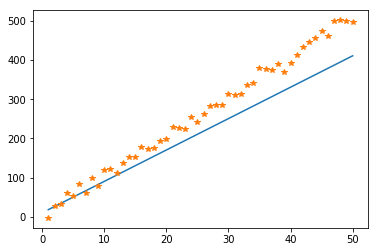

In [17]:
plt.plot(X_data, pred)
plt.plot(X_data, Y, '*')
plt.savefig('../visuals/linearreg.png')
plt.show()

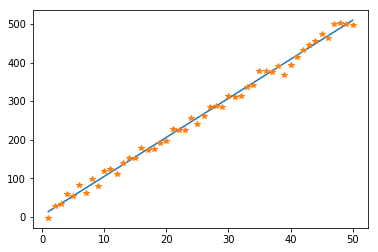

In [22]:
f = open('../txt_files/linearweights.txt','r')
pred = np.dot(X,np.array([float(x) for x in f.readline().split()]))
plt.plot(X_data, pred)
plt.plot(X_data, Y, '*')
plt.savefig('../visuals/linearreg.png')
plt.show()